# Análise de investimentos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance 

from datetime import datetime, timedelta
from pandas_datareader import data as pdr
from scipy import stats


yfinance.pdr_override()
# end = "2022-12-31"
end = datetime.now()

In [2]:
procter_and_gamble = pdr.get_data_yahoo('PG', start='1995-01-01', end=end)

# opção do csv baixado da página a yahoo
# procter_and_gamble = pd.read_csv('../data/PG.csv')

[*********************100%%**********************]  1 of 1 completed


In [3]:
procter_and_gamble.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.626415,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.565282,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.458301,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.473584,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.443020,1795200


In [4]:
procter_and_gamble.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-14,148.460007,148.550003,144.380005,144.660004,144.660004,10565200
2023-12-15,143.179993,144.250000,142.500000,143.960007,143.960007,14549700
2023-12-18,144.169998,147.490005,144.149994,146.169998,146.169998,8421800
2023-12-19,145.669998,146.339996,145.389999,146.169998,146.169998,5232100
2023-12-20,145.570007,146.070007,145.140106,145.163895,145.163895,1748659


In [5]:
pg = procter_and_gamble[["Adj Close"]].copy().reset_index()
pg['Date'] = pd.to_datetime(pg['Date'])
pg['ano'] = pg.Date.dt.year
pg['mes'] = pg.Date.dt.month
pg = pg[['Date', 'ano', 'mes', 'Adj Close']]

# Calculando o retorno de um investimento

## Retorno simples 
Calculado sobre o preço de fechamento

### $$\text{retorno simples} = \frac{P_1-P_0}{P_0} = \frac{P_1}{P_0}-1$$ 

In [6]:
pg

,Date,ano,mes,Adj Close
0,1995-01-03,1995,1,7.626415
1,1995-01-04,1995,1,7.565282
2,1995-01-05,1995,1,7.458301
3,1995-01-06,1995,1,7.473584
4,1995-01-09,1995,1,7.443020
...,...,...,...,...
7289,2023-12-14,2023,12,144.660004
7290,2023-12-15,2023,12,143.960007
7291,2023-12-18,2023,12,146.169998
7292,2023-12-19,2023,12,146.169998


In [7]:
pg['retorno_simples'] = (pg['Adj Close']/pg['Adj Close'].shift(1)) - 1

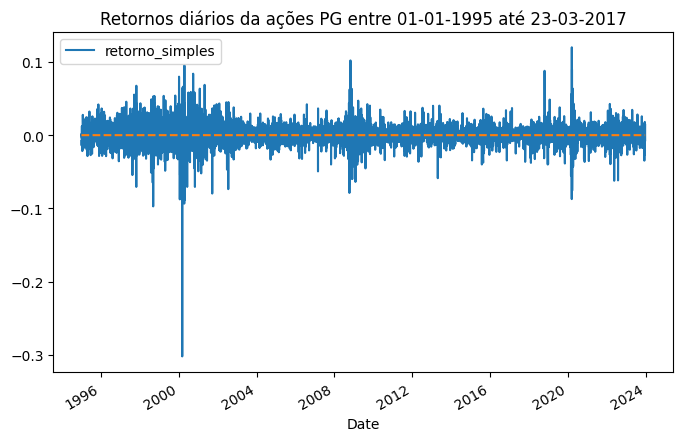

In [8]:
pg[['Date', 'retorno_simples']].plot(x='Date', y='retorno_simples', figsize=(8, 5))
plt.title("Retornos diários da ações PG entre 01-01-1995 até 23-03-2017")
plt.plot(pg.Date, len(pg.Date)*[0], '--')
plt.show()

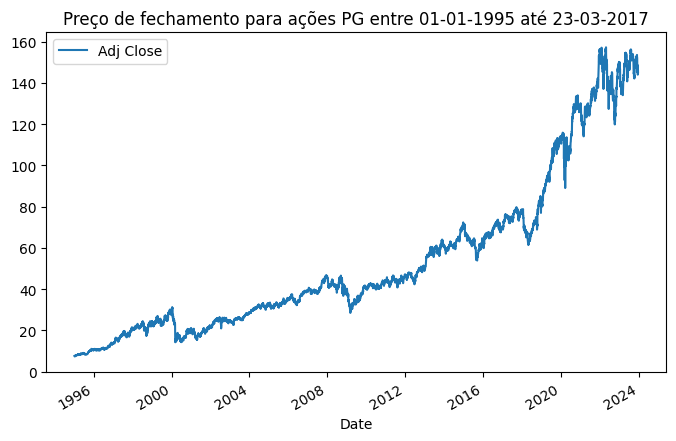

In [9]:
pg[['Date', 'Adj Close']].plot(x='Date', y='Adj Close',figsize=(8, 5))
plt.title("Preço de fechamento para ações PG entre 01-01-1995 até 23-03-2017")
plt.show()

In [10]:
avg_returns = pg['retorno_simples'].mean()
avg_returns

0.0005021901002265815

In [11]:
# Retorno anual
avg_returns_year = pg['retorno_simples'].mean() * 250
print(f'Retorno anual médio {round(avg_returns_year*100, 3)} %')

Retorno anual médio 12.555 %


## Retorno logarítmo

Lembrando que fazemos uma análise de um único ativo. Nesse caso é mais interessante analisar o retorno logarítmo.

### $$\text{retorno log} = \ln\left(\frac{P_{t}}{P_{t-1}}\right)$$

In [12]:
pg['retorno_log'] = np.log(pg['Adj Close']/pg['Adj Close'].shift(1))

In [13]:
pg

,Date,ano,mes,Adj Close,retorno_simples,retorno_log
0,1995-01-03,1995,1,7.626415,NaN,NaN
1,1995-01-04,1995,1,7.565282,-0.008016,-0.008048
2,1995-01-05,1995,1,7.458301,-0.014141,-0.014242
3,1995-01-06,1995,1,7.473584,0.002049,0.002047
4,1995-01-09,1995,1,7.443020,-0.004090,-0.004098
...,...,...,...,...,...,...
7289,2023-12-14,2023,12,144.660004,-0.026383,-0.026737
7290,2023-12-15,2023,12,143.960007,-0.004839,-0.004851
7291,2023-12-18,2023,12,146.169998,0.015351,0.015235
7292,2023-12-19,2023,12,146.169998,0.000000,0.000000


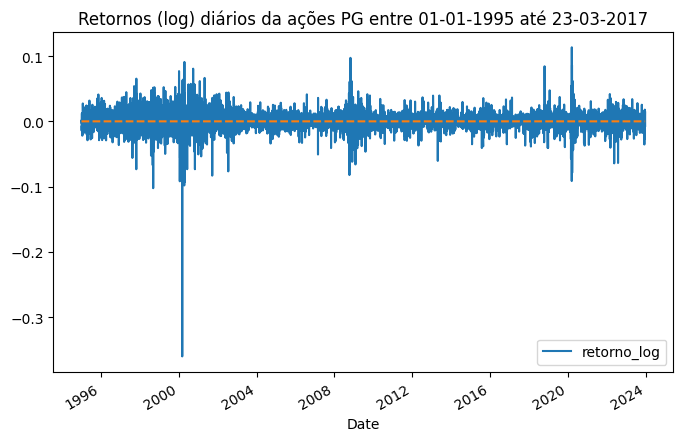

In [14]:
pg[['Date', 'retorno_log']].plot(x='Date', y='retorno_log',figsize=(8, 5))
plt.title("Retornos (log) diários da ações PG entre 01-01-1995 até 23-03-2017")
plt.plot(pg.Date, len(pg.Date)*[0], '--')
plt.show()

## Retorno de multiplos investimentos

Vamos considerar um portifólio simples, onde os quatro ativos tem pesos iguais, e calcular as suas respectivas taxas de retorno histórico.

\begin{array}{|c|c|c|}
\hline
\text{Ativo} & \text{Taxa média anual de retorno(\%)} & Peso \\
\hline
\text{P\&G} &   0.318524 & 0.25 \\
\text{MSFT} &  0.153581 & 0.25\\
\text{GE} &  0.116717 & 0.25\\
\text{F} & 0.126224 & 0.25\\
\hline
\end{array}

In [15]:
# portifólio com ações da P&G,Microsoft, Ford, General Electrics
tickers = ["PG", 'MSFT', 'F', 'GE'] 
preco_fechamento = pdr.get_data_yahoo(tickers, start='1995-01-01', end=end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [16]:
acoes = preco_fechamento.copy()
acoes = acoes.rename(
    columns={'F': 'ford', 
             'GE': 'ge',
             'MSFT': 'microsoft', 
             'PG': 'pg'}
)

acoes.head()

,ford,ge,microsoft,pg
Date,,,,
1995-01-03,3.819580,25.494436,2.332130,7.626418
1995-01-04,3.922347,25.494436,2.349082,7.565282
1995-01-05,3.888092,25.556911,2.310334,7.458298
1995-01-06,3.888092,25.431946,2.349082,7.473583
1995-01-09,3.956604,25.181990,2.334551,7.443020


## Retornos simples - indicados para avaliar uma carteira de investimentos diversificados
 - Normalizando os valores - comparar do mesmo ponto inicial- data base
### $$\frac{P_{t}}{P_{0}}*100$$


In [17]:
acoes.iloc[0]

ford          3.819580
ge           25.494436
microsoft     2.332130
pg            7.626418
Name: 1995-01-03 00:00:00, dtype: float64

In [18]:
acoes = (acoes/acoes.iloc[0])*100

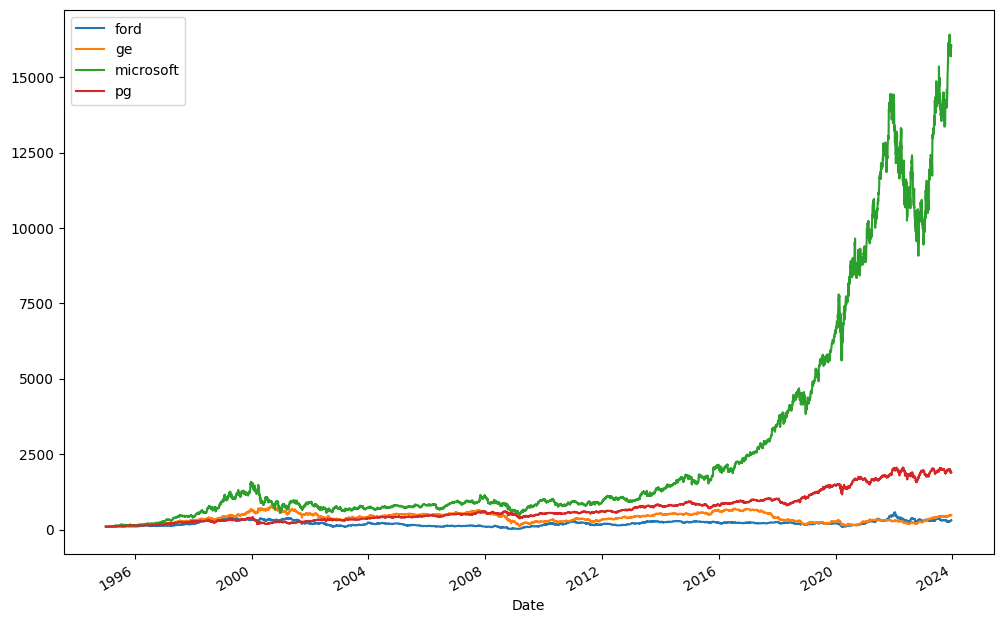

In [19]:
acoes.plot(figsize=(12, 8))
plt.show()

In [20]:
# retorno simples para um portifólio
retornos = (acoes/acoes.shift(1))-1

In [21]:
retornos.head()

,ford,ge,microsoft,pg
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.026906,0.000000,0.007269,-0.008016
1995-01-05,-0.008733,0.002451,-0.016495,-0.014141
1995-01-06,0.000000,-0.004890,0.016772,0.002049
1995-01-09,0.017621,-0.009828,-0.006186,-0.004090


In [22]:
pesos = np.array(4*[0.25])
pesos

array([0.25, 0.25, 0.25, 0.25])

In [23]:
# estimando o retorno anual médio
retorno_anual = retornos.mean() *250
retorno_anual = retorno_anual.reset_index().rename(
    columns={'index':'ativo',
             0:'retorno médio anual'
})

retorno_anual

,ativo,retorno médio anual
0,ford,0.120003
1,ge,0.105422
2,microsoft,0.222932
3,pg,0.125548


In [24]:
print(f"""Retorno anual da carteira de investimentos com pesos iguais
{round(np.dot(retorno_anual['retorno médio anual'], pesos) * 100, 3)} %""")

Retorno anual da carteira de investimentos com pesos iguais
14.348 %


In [25]:
pesos_2 = np.array([0.4,0.4, 0.15, 0.05])
print(f"""Retorno anual da carteira de investimentos com pesos diferentes
{round(np.dot(retorno_anual['retorno médio anual'], pesos_2) * 100, 3)} %""")

Retorno anual da carteira de investimentos com pesos diferentes
12.989 %


## Índices de ações- calculando taxas de retorno desses indices

In [26]:
# S&P500, NASDAQ, indice alemão DAX, footsie
index_tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']

indices = pdr.get_data_yahoo(index_tickers, start='1997-01-01', end=end)['Adj Close']
indices = indices.rename(
    columns={'^GSPC': 'S&P500',
             '^IXIC': 'NASDAQ',
             '^GDAXI': 'DAX',
             '^FTSE': 'Footsie'}
)

[*********************100%%**********************]  4 of 4 completed


In [27]:
indices.head()

,Footsie,DAX,S&P500,NASDAQ
Date,,,,
1997-01-02,4057.399902,2820.810059,737.010010,1280.699951
1997-01-03,4089.500000,2863.260010,748.030029,1310.680054
1997-01-06,4106.500000,2890.199951,747.650024,1316.400024
1997-01-07,4078.800049,2876.340088,753.229980,1327.729980
1997-01-08,4087.500000,2904.080078,748.409973,1320.349976


In [28]:
indices.tail()

,Footsie,DAX,S&P500,NASDAQ
Date,,,,
2023-12-14,7649.000000,16752.230469,4719.549805,14761.559570
2023-12-15,7576.399902,16751.439453,4719.189941,14813.919922
2023-12-18,7614.500000,16650.550781,4740.560059,14904.809570
2023-12-19,7638.000000,16744.410156,4768.370117,15003.219727
2023-12-20,NaN,NaN,4771.080078,15037.881836


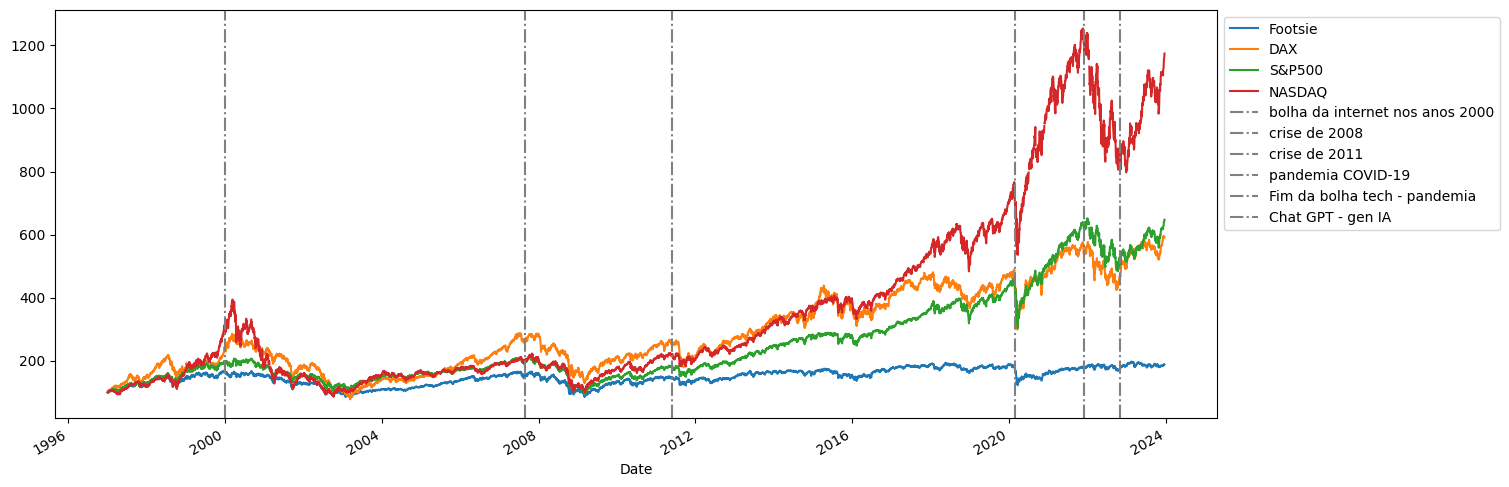

In [29]:
# normalizando para o valor base
(100*(indices/indices.iloc[0])).plot(figsize=(15, 6))
plt.axvline(x=pd.to_datetime("2000-01-01"), color='gray', label='bolha da internet nos anos 2000', ls='-.')
plt.axvline(x=pd.to_datetime("2007-08-30"), color='gray', label='crise de 2008', ls='-.')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='gray', label='crise de 2011', ls='-.')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='gray', label='pandemia COVID-19', ls='-.')
plt.axvline(x=pd.to_datetime("2021-12-01"), color='gray', label='Fim da bolha tech - pandemia', ls='-.')
plt.axvline(x=pd.to_datetime("2022-11-01"), color='gray', label='Chat GPT - gen IA', ls='-.')
# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

In [30]:
# retornos
retorno_indices = indices/indices.shift(1)-1
retorno_indices.tail()

,Footsie,DAX,S&P500,NASDAQ
Date,,,,
2023-12-14,0.013327,-0.000824,0.002647,0.001873
2023-12-15,-0.009491,-0.000047,-0.000076,0.003547
2023-12-18,0.005029,-0.006023,0.004528,0.006135
2023-12-19,0.003086,0.005637,0.005866,0.006603
2023-12-20,NaN,NaN,0.000568,0.002310


In [31]:
# Taxas positivas de retornos
retorno_anual_indices = retorno_indices.mean()*250
retorno_anual_indices = retorno_anual_indices.reset_index().rename(
    columns={'index': 'ativo',
             0: 'retorno anual médio'})

retorno_anual_indices

,ativo,retorno anual médio
0,Footsie,0.034160
1,DAX,0.076795
2,S&P500,0.090054
3,NASDAQ,0.123112


## Comparando o preço de fechamento de uma ação com os indices de mercado

In [32]:
tickers = ['PG', '^GSPC', '^DJI']

indices_comparados = pdr.get_data_yahoo(tickers, start='1997-01-01', end=end)['Adj Close']
indices_comparados = indices_comparados.rename(
    columns={'^GSPC': 'S&P500',
             '^DJI': 'DowJones'}
)

[*********************100%%**********************]  3 of 3 completed


In [33]:
indices_comparados.tail()

,PG,DowJones,S&P500
Date,,,
2023-12-14,144.660004,37248.351562,4719.549805
2023-12-15,143.960007,37305.160156,4719.189941
2023-12-18,146.169998,37306.019531,4740.560059
2023-12-19,146.169998,37557.921875,4768.370117
2023-12-20,145.163895,37588.000000,4771.080078


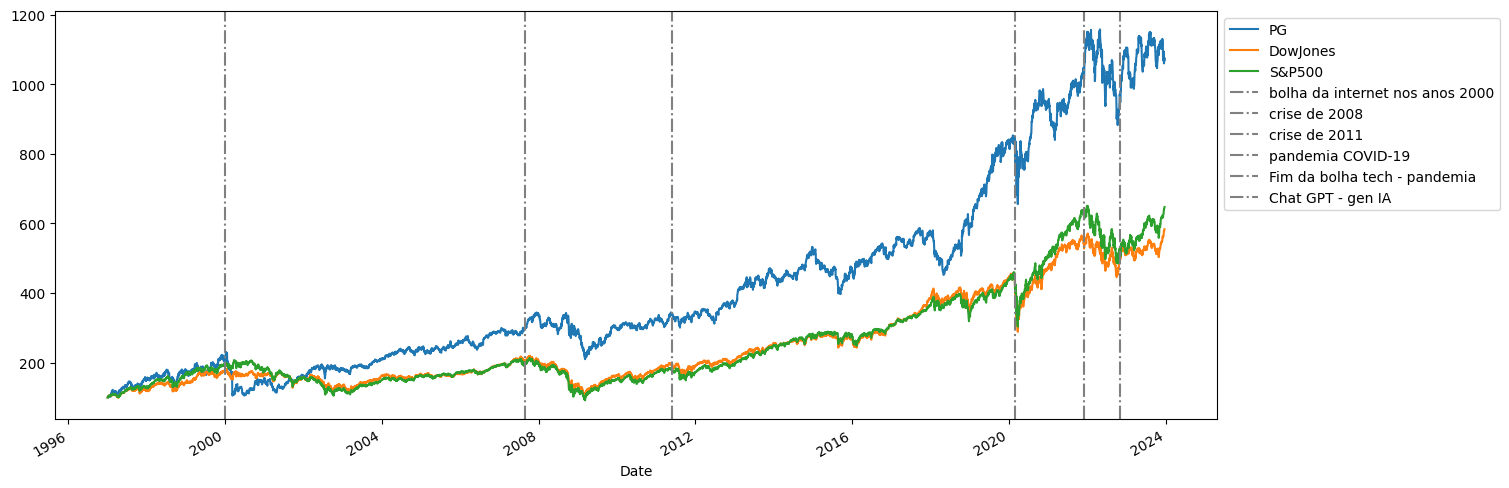

In [34]:
# normalizando para o valor base
indices_comparados = 100*(indices_comparados/indices_comparados.iloc[0])
                      
indices_comparados.plot(figsize=(15, 6))
plt.axvline(x=pd.to_datetime("2000-01-01"), color='gray', label='bolha da internet nos anos 2000', ls='-.')
plt.axvline(x=pd.to_datetime("2007-08-30"), color='gray', label='crise de 2008', ls='-.')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='gray', label='crise de 2011', ls='-.')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='gray', label='pandemia COVID-19', ls='-.')
plt.axvline(x=pd.to_datetime("2021-12-01"), color='gray', label='Fim da bolha tech - pandemia', ls='-.')
plt.axvline(x=pd.to_datetime("2022-11-01"), color='gray', label='Chat GPT - gen IA', ls='-.')

# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

In [35]:
indices_comparados

,PG,DowJones,S&P500
Date,,,
1997-01-02,100.000000,100.000000,100.000000
1997-01-03,101.641251,101.577024,101.495233
1997-01-06,102.344681,101.935431,101.443673
1997-01-07,104.220483,102.455105,102.200780
1997-01-08,102.344681,101.660689,101.546785
...,...,...,...
2023-12-14,1065.286578,578.166985,640.364411
2023-12-15,1060.131750,579.048765,640.315583
2023-12-18,1076.406285,579.062104,643.215153


# Calculando o risco de um investimento

In [36]:
# comparar os históricos e o risco entre dois ativos de mesmo negócio Beiersdorf e P&G
tickers = ['PG', 'BEI.DE']

dados_hist = pdr.get_data_yahoo(tickers, start='2007-01-01', end="2022-12-31")['Adj Close']
dados_hist = dados_hist.rename(
    columns={'PG': 'P&G',
             'BEI.DE': 'Beiersdorf'}
)

[*********************100%%**********************]  2 of 2 completed


In [37]:
dados_hist.head()

,Beiersdorf,P&G
Date,,
2007-01-02,39.697174,NaN
2007-01-03,39.784248,39.577766
2007-01-04,40.045471,39.277283
2007-01-05,39.222233,38.940006
2007-01-08,39.230156,39.025848


In [38]:
dados_hist.tail()

,Beiersdorf,P&G
Date,,
2022-12-23,105.788757,148.841446
2022-12-27,106.683594,150.138519
2022-12-28,105.937897,148.197815
2022-12-29,106.832726,148.812180
2022-12-30,106.584160,147.807693


In [39]:
dados_hist = dados_hist.dropna()

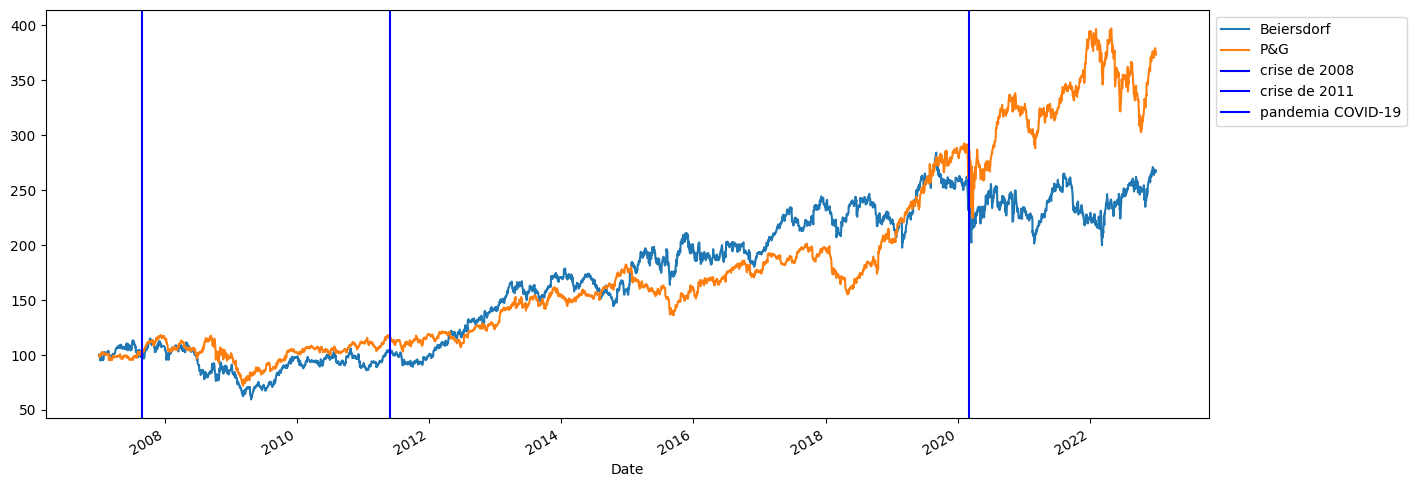

In [40]:
# normalizando
(100*(dados_hist/dados_hist.iloc[0])).plot(figsize=(15, 6))
plt.axvline(x=pd.to_datetime("2007-08-30"), color='b', label='crise de 2008')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='b', label='crise de 2011')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='b', label='pandemia COVID-19')

# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

## Calculando risco

In [41]:
sec_returns = np.log(dados_hist/dados_hist.shift(1))

In [42]:
# media anual
avg_sec_returns = (sec_returns.mean() * 250).reset_index().rename(
    columns={'index': 'ativo',
             0: 'media anual de retorno'})
avg_sec_returns

,ativo,media anual de retorno
0,Beiersdorf,0.062229
1,P&G,0.083206


In [43]:
# risco - calculao do desvio padrão
risco = ((sec_returns.std() * 250)**0.5).reset_index().rename(
    columns={'index': 'ativo',
             0: 'risco'})
risco

,ativo,risco
0,Beiersdorf,1.860000
1,P&G,1.729692


## Covariancia e Correlação 

### $$
cov = \begin{pmatrix}
\sigma_{11}^2 & \sigma_{12} & \ldots & \sigma_{1n}\\
\sigma_{21} & \sigma_{22}^2 & \ldots & \sigma_{2n}\\
\vdots & \vdots  & \ddots  &  \vdots \\
\sigma_{m1} & \sigma_{m2} & \ldots & \sigma_{mn}^2
\end{pmatrix}
$$

In [44]:
PG_var = sec_returns['P&G'].var()
PG_var

0.00014321712966671544

In [45]:
# valor anual
PG_var = sec_returns['P&G'].var() * 250
PG_var

0.03580428241667886

In [46]:
beiersdorf_var = sec_returns['Beiersdorf'].var()
beiersdorf_var 

0.00019150115417488126

In [47]:
# valor anual
beiersdorf_var = sec_returns['Beiersdorf'].var() * 250
beiersdorf_var 

0.047875288543720314

In [48]:
covariancia = sec_returns.cov()
covariancia

,Beiersdorf,P&G
Beiersdorf,0.000192,0.000045
P&G,0.000045,0.000143


In [49]:
covariancia_anual = sec_returns.cov() * 250
covariancia_anual

,Beiersdorf,P&G
Beiersdorf,0.047875,0.011345
P&G,0.011345,0.035804


In [50]:
# não podemos associar a correlação a um valor anual como fizemos com a covariância,
# multiplicando por 250!
correlacao = sec_returns.corr()
correlacao

,Beiersdorf,P&G
Beiersdorf,1.000000,0.274017
P&G,0.274017,1.000000


## Calculando risco de um portifólio
- 1 portifólio com pesos iguais
### $$w^{T} \cdot \sigma_{1, 2} \cdot w$$

In [51]:
weights = np.array([0.5, 0.5])

In [52]:
# variância do portifólio
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() *250, weights))
print("Variância da carteira: ", pfolio_var)

Variância da carteira:  0.02659235142999354


In [53]:
#volatilidade
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() *250, weights)))**0.5

print("Volatilidade da carteira: ", pfolio_vol*100, "%")


Volatilidade da carteira:  16.30716144213748 %


## Risco diversificado e não diversificado de um portifólio

In [54]:
pesos = np.array([0.5, 0.5])

PG_var_a = sec_returns['P&G'].var() * 250
PG_var_a

0.03580428241667886

In [55]:
beiersdorf_var_a = sec_returns['Beiersdorf'].var() * 250
beiersdorf_var_a

0.047875288543720314

In [56]:
# risco diversificavel
diverse_risk = pfolio_var - (weights[0]**2 * PG_var_a) - (weights[1]**2 * beiersdorf_var_a)
diverse_risk

0.00567245868989375

In [57]:
# Risco não diversificável ou sistemático

non_diverse_risk = pfolio_var - diverse_risk
non_diverse_risk

0.02091989274009979

In [58]:
non_diverse_risk2 = (weights[0]**2 * PG_var_a) + (weights[1]**2 * beiersdorf_var_a)
non_diverse_risk2

0.020919892740099793

In [59]:
non_diverse_risk2 == non_diverse_risk

False

# Análise de regressão 

In [60]:
data = pd.read_excel('../data/Housing.xlsx')

In [61]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [62]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


## Regressão simples - OLS ordinary least squares

In [63]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

In [64]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [65]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

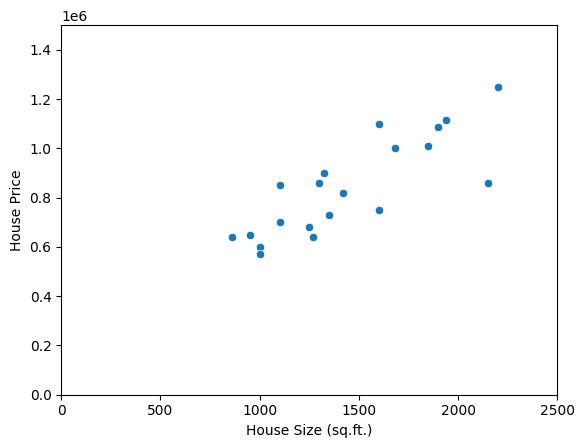

In [66]:
sns.scatterplot(data=data, x='House Size (sq.ft.)', y='House Price')
plt.axis([0, 2500, 0, 1500000])
plt.show()

In [67]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [68]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           8.13e-06
Time:                        13:37:54   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9

In [69]:
parametros = reg.params.reset_index().rename(columns={'index':'variaveis', 0:'coeficientes'})

In [70]:
# estimando o preço de uma casa com 1000 m²
parametros['coeficientes'][1] * 1000 + parametros['coeficientes'][0]

662722.5223753222

## Parâmetros usando o scipy

In [71]:
slop, intercepto, r_quadrado, p_valor, std_erro = stats.linregress(X, Y)

In [72]:
print('Inclinação:', slop)
print('Intercepto:', intercepto)
print('R^2:', r_quadrado**2)
print('p-valor:', p_valor)
print('Desvio padão do erro:', std_erro)

Inclinação: 401.91628631922595
Intercepto: 260806.2360560964
R^2: 0.678279986579124
p-valor: 8.129642377231308e-06
Desvio padão do erro: 65.24299510636492


# Otimização de portifólio - Teoria de Markowitz

## Carregando dados

In [73]:
assets = ['PG', '^GSPC']

portifolio_data = pdr.get_data_yahoo(assets, start='2007-01-01', end="2022-12-31")['Adj Close']
portifolio_data = portifolio_data.rename(
    columns={'PG': 'P&G',
             '^GSPC': 'S&P500'}
)

[*********************100%%**********************]  2 of 2 completed


In [74]:
portifolio_data.tail()

,P&G,S&P500
Date,,
2022-12-23,148.841446,3844.820068
2022-12-27,150.138519,3829.250000
2022-12-28,148.197815,3783.219971
2022-12-29,148.812180,3849.280029
2022-12-30,147.807693,3839.500000


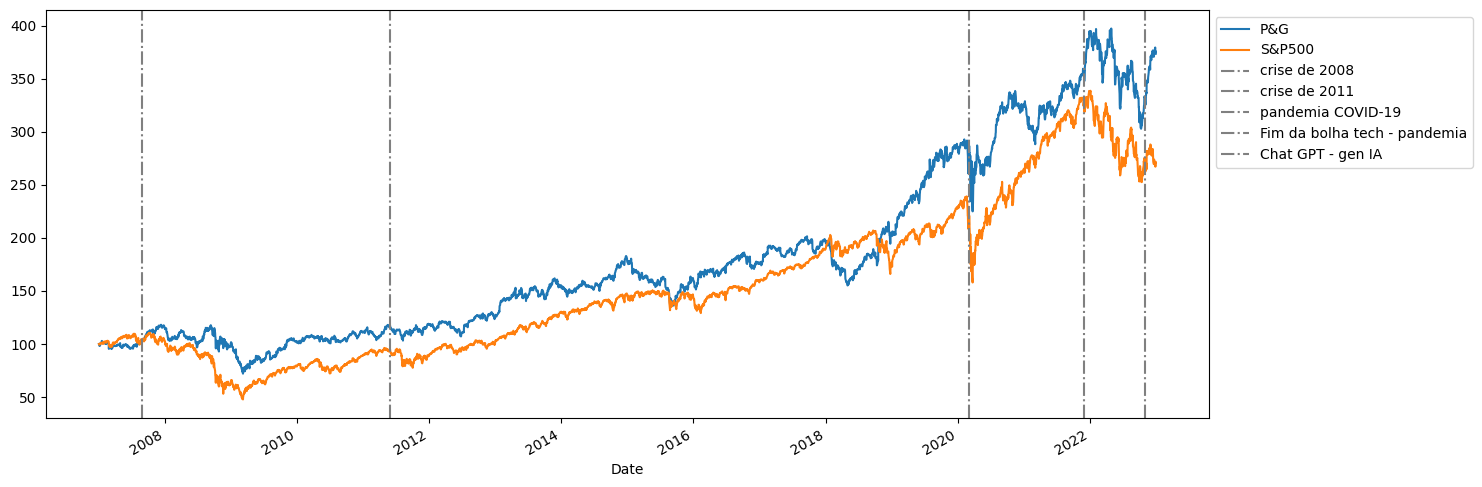

In [75]:
(100*portifolio_data/portifolio_data.iloc[0]).plot(figsize=(15, 6))

plt.axvline(x=pd.to_datetime("2007-08-30"), color='gray', label='crise de 2008', ls='-.')
plt.axvline(x=pd.to_datetime("2011-06-01"), color='gray', label='crise de 2011', ls='-.')
plt.axvline(x=pd.to_datetime("2020-03-01"), color='gray', label='pandemia COVID-19', ls='-.')
plt.axvline(x=pd.to_datetime("2021-12-01"), color='gray', label='Fim da bolha tech - pandemia', ls='-.')
plt.axvline(x=pd.to_datetime("2022-11-01"), color='gray', label='Chat GPT - gen IA', ls='-.')

# place legend outside
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.show()

## Retornos individuais 

Vamos usar a série histórica para calcular os retornos individuais, e a covariância e correlação

In [76]:
retorno_log = np.log(portifolio_data/portifolio_data.shift(1))
retorno_log

,P&G,S&P500
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.001228
2007-01-05,-0.008624,-0.006103
2007-01-08,0.002202,0.002218
2007-01-09,-0.002517,-0.000517
...,...,...
2022-12-23,0.002821,0.005851
2022-12-27,0.008677,-0.004058
2022-12-28,-0.013010,-0.012093


In [77]:
# média de retorno anual
retorno_log.mean() * 250

P&G       0.081801
S&P500    0.061900
dtype: float64

In [78]:
# covariância dos ativos
retorno_log.cov() * 250

,P&G,S&P500
P&G,0.035160,0.024233
S&P500,0.024233,0.042447


In [79]:
# correlação entre os ativos
retorno_log.corr()

,P&G,S&P500
P&G,1.000000,0.627283
S&P500,0.627283,1.000000


In [80]:
num_ativos = len(assets)
num_ativos

2

## Pesos aleatórios

In [81]:
pesos = np.random.random(num_ativos)

#normalizar os pesos - para que a sua soma seja igual a 1 = 100%
pesos /= np.sum(pesos)
pesos

array([0.98469022, 0.01530978])

In [82]:
pesos.sum()

1.0

## Retorno esperados do portifólio
### $$return = w_1 r_1 + w_2 r_2$$

In [83]:
np.sum(pesos*retorno_log.mean()) *250

0.08149595359235813

## Variância do portifólio esperada
### $$\sigma^{2} = w^{T} \cdot \sigma \cdot w$$

In [84]:
variancia_portifolio = np.dot(pesos.T, np.dot(retorno_log.cov() * 250, pesos))
variancia_portifolio

0.03483209066690316

## Volatilidade esperada do portifólio - desvio padrão do portifólio
### $$\sigma = \sqrt{\sigma^{2}}$$

In [85]:
volatilidade = np.sqrt(variancia_portifolio)
volatilidade

0.18663357325760863

Considerando 1000 combinações diferentes para os dois ativos - combinações dos valores dos pesos para cada ativo, podemos simular a fronteira eficiente de Markowitz.

In [86]:
retorno_portifolio = []
volatilidade_portifolio = []

for x in range(1000):
    pesos = np.random.random(num_ativos)
    pesos /= np.sum(pesos)
    retorno_portifolio.append(np.sum(pesos*retorno_log.mean()) *250)
    
    variancia_portifolio = np.dot(pesos.T, np.dot(retorno_log.cov() * 250, pesos))
    volatilidade_portifolio.append(np.sqrt(variancia_portifolio))

In [87]:
portifolio = pd.DataFrame(
    {'retorno': retorno_portifolio,
     'volatilidade':volatilidade_portifolio})

In [88]:
portifolio

,retorno,volatilidade
0,0.071112,0.178406
1,0.063593,0.198894
2,0.063170,0.200599
3,0.064883,0.194014
4,0.064591,0.195073
...,...,...
995,0.072569,0.176899
996,0.075847,0.176720
997,0.068146,0.184077
998,0.068690,0.182785


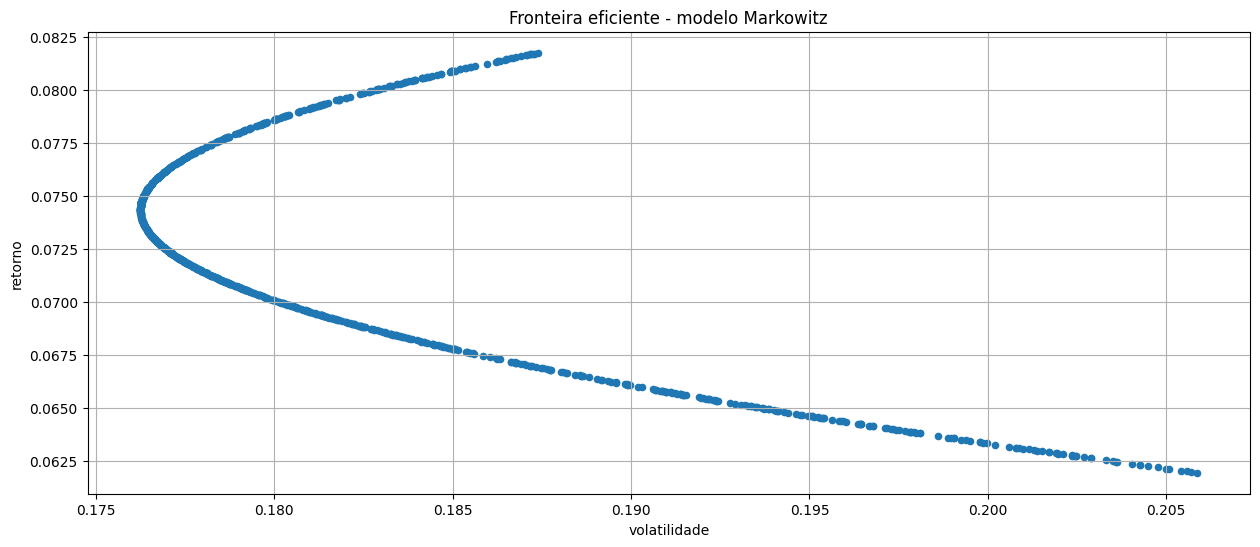

In [89]:
portifolio.plot(x='volatilidade', y='retorno', kind='scatter', figsize=(15, 6))
plt.title('Fronteira eficiente - modelo Markowitz')
plt.grid()
plt.show()

# Modelo de precificação de ativos financeiros

## Calculando o beta de uma ação

Medido com dados dos ultimo 5 anos. Mede a quantidade inerente de risco de um ativo em relação a uma índice de mercado.

### $$\beta= \frac{cov(stock, market)}{var(market)}$$

In [121]:
assets = ['PG', '^GSPC']

portifolio_data = pdr.get_data_yahoo(assets, start=end - timedelta(days=5*250), end=end)['Adj Close']
portifolio_data = portifolio_data.rename(
    columns={'PG': 'P&G',
             '^GSPC': 'S&P500'}
)

[*********************100%%**********************]  2 of 2 completed


In [122]:
portifolio_data

,P&G,S&P500
Date,,
2020-07-20,114.889565,3251.840088
2020-07-21,114.733620,3257.300049
2020-07-22,115.715202,3276.020020
2020-07-23,116.463860,3235.659912
2020-07-24,116.279243,3215.629883
...,...,...
2023-12-14,144.660004,4719.549805
2023-12-15,143.960007,4719.189941
2023-12-18,146.169998,4740.560059


In [123]:
sec_returns = np.log(portifolio_data/portifolio_data.shift(1))

In [124]:
sec_returns

,P&G,S&P500
Date,,
2020-07-20,NaN,NaN
2020-07-21,-0.001358,0.001678
2020-07-22,0.008519,0.005731
2020-07-23,0.006449,-0.012396
2020-07-24,-0.001586,-0.006210
...,...,...
2023-12-14,-0.026737,0.002644
2023-12-15,-0.004851,-0.000076
2023-12-18,0.015235,0.004518


In [125]:
cov = sec_returns.cov() * 250
cov

,P&G,S&P500
P&G,0.029265,0.013443
S&P500,0.013443,0.030561


In [126]:
cov_with_market = cov.iloc[0, 1]

In [127]:
market_var = sec_returns['S&P500'].var() * 250
market_var

0.03056105839350989

In [128]:
# Ação defensiva
beta = cov_with_market/market_var
beta

0.4398894665445583

## Modelo CAPM
### $$r_{i} = r_{f}+ \beta_{im}(r_{m}-r_{f})$$

- $r_{i}$ - taxa de retorno esperado do ativo.
- $r_{f}$ - retorno livre de risco - taxa mínima de rico necessária para o investidor comprar um ativo.
- $\beta_{im}$ - coeficiente beta entre o ativo e o índice de mercado.
- $r_{m}$ - retorno do mercado.
- $(r_{m}-r_{f})$ - é o prêmio do capital, ou prêmio de risco das ações.

In [129]:
PG_er = 0.025 + beta*0.05
PG_er

0.04699447332722792

## Índice de Sharpe 
### $$\text{Razão Sharp} = \frac{r_{i}-r_{f}}{\sigma_{i}}$$


In [130]:
sharp_pg = (PG_er - 0.025)/(sec_returns['P&G'].std()*250**0.5)
sharp_pg

0.12857003678054796

## O Coeficiente $\alpha$

O intercepto no modelo CAPM é o parâmetro $\alpha$, que fornece uma medida de quão bom ou ruim é o desempenho de uma gestor de investimentos.

### $$r_{i} = \alpha + r_{f}+ \beta_{im}(r_{m}-r_{f})$$